# NFL 4th Down Go-For-It Project

In [60]:
# Import Statements

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np

# Chart Studio - Display Plotly plots
import chart_studio.plotly as py
#chart_studio.tools.set_credentials_file(username='<USERNAME>', api_key='<API_KEY>')

In [3]:
# Display Settings
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 400)

## Data

In [1]:
# 15 seasons of data from 2007 to 2021 using nflfastR
YEARS = range(2007, 2022)


full_data = pd.DataFrame()

for i in YEARS:  
    i_data = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' \
                         'play_by_play_' + str(i) + '.csv.gz?raw=True',
                         compression='gzip', low_memory=False)

    full_data = full_data.append(i_data, sort=True)

In [4]:
# Setting dataframe to csv file to easily load the file after setting the df
# full_data.to_csv('full_data.csv.gz', compression='gzip', index=False)
full_data = pd.read_csv('full_data.csv.gz', compression='gzip', low_memory=False)

In [5]:
# isolating just the regular season
original_data = full_data.loc[(full_data.season_type=='REG')]

In [7]:
# retrieving each fourth and short down and distance plays
fourth_and_one = original_data.loc[(original_data.down==4) & (original_data.ydstogo==1) & (original_data.play_type != 'no_play') & (original_data.play_type != 'qb_kneel')]

fourth_and_two = original_data.loc[(original_data.down==4) & (original_data.ydstogo==2) & (original_data.play_type != 'no_play') & (original_data.play_type != 'qb_kneel')]

fourth_and_three = original_data.loc[(original_data.down==4) & (original_data.ydstogo==3) & (original_data.play_type != 'no_play') & (original_data.play_type != 'qb_kneel')]

In [8]:
# getting the count of fourth and short plays for each season and play type
result = fourth_and_one[["desc", "season", "play_type"]].groupby(['season', 'play_type'], as_index = False).count()

result2 = fourth_and_two[["desc", "season", "play_type"]].groupby(['season', 'play_type'], as_index = False).count()

result3 = fourth_and_three[["desc", "season", "play_type"]].groupby(['season', 'play_type'], as_index = False).count()

In [9]:
# calculating the go for it rate for each season
years = range(2007, 2022)
season = []

prob1 = []
prob2 = []
prob3 = []

for i in years:
    season.append(i)
    
    num_prob = result.loc[(result.season == i) & ((result.play_type == "pass") | (result.play_type == "run"))].desc.sum()
    denom_prob = result.loc[(result.season == i)].desc.sum()

    prob1.append((num_prob / denom_prob) * 100)
    
    num_prob2 = result2.loc[(result2.season == i) & ((result2.play_type == "pass") | (result2.play_type == "run"))].desc.sum()
    denom_prob2 = result2.loc[(result2.season == i)].desc.sum()

    prob2.append((num_prob2 / denom_prob2) * 100)
    
    num_prob3 = result3.loc[(result3.season == i) & ((result3.play_type == "pass") | (result3.play_type == "run"))].desc.sum()
    denom_prob3 = result3.loc[(result3.season == i)].desc.sum()

    prob3.append((num_prob3 / denom_prob3) * 100)
        

In [10]:
# creating a df given the go-for-it rates
fourth_down_dict = {"Season": season, "4th and 1": prob1, "4th and 2": prob2, "4th and 3": prob3}

fourth_down_df = pd.DataFrame(fourth_down_dict)
    
df = pd.melt(fourth_down_df, id_vars='Season', value_vars=fourth_down_df.columns[1:])

In [62]:
# plotting the result
fig = px.line(df, x='Season', y='value', color='variable', markers = True, title = "4th and Short Go-For-It Rates per Season", labels={"value": "Percentage (%)", "variable": ""})

fig.add_annotation(
    text = ("Data: nflfastR")
    , showarrow=False
    , x = 0
    , y = -0.15
    , xref='paper'
    , yref='paper' 
    , xanchor='left'
    , yanchor='bottom'
    , xshift=-1
    , yshift=-5
    , font=dict(size=10, color="grey")
    , align="left"
    ,)


# fig.show()
py.plot(fig)

'https://plotly.com/~slingam00/34/'

## Adding WP to plot

In [63]:
# WP of 20 - 80 % added
wp_data = full_data.loc[(full_data.season_type=='REG') & ((full_data.wp >= 0.2) & (full_data.wp <= 0.8))]

In [64]:
wp_fourth_and_one = wp_data.loc[(wp_data.down==4) & (wp_data.ydstogo==1) & (wp_data.play_type != 'no_play') & (wp_data.play_type != 'qb_kneel')]

wp_fourth_and_two = wp_data.loc[(wp_data.down==4) & (wp_data.ydstogo==2) & (wp_data.play_type != 'no_play') & (wp_data.play_type != 'qb_kneel')]

wp_fourth_and_three = wp_data.loc[(wp_data.down==4) & (wp_data.ydstogo==3) & (wp_data.play_type != 'no_play') & (wp_data.play_type != 'qb_kneel')]

In [65]:
wp_result = wp_fourth_and_one[["desc", "season", "play_type"]].groupby(['season', 'play_type'], as_index = False).count()

wp_result2 = wp_fourth_and_two[["desc", "season", "play_type"]].groupby(['season', 'play_type'], as_index = False).count()

wp_result3 = wp_fourth_and_three[["desc", "season", "play_type"]].groupby(['season', 'play_type'], as_index = False).count()

In [66]:
years = range(2007, 2022)
wp_season = []

wp_prob1 = []
wp_prob2 = []
wp_prob3 = []

for i in years:
    wp_season.append(i)
    
    num_prob = wp_result.loc[(wp_result.season == i) & ((wp_result.play_type == "pass") | (wp_result.play_type == "run"))].desc.sum()
    denom_prob = wp_result.loc[(wp_result.season == i)].desc.sum()

    wp_prob1.append((num_prob / denom_prob) * 100)
    
    num_prob2 = wp_result2.loc[(wp_result2.season == i) & ((wp_result2.play_type == "pass") | (wp_result2.play_type == "run"))].desc.sum()
    denom_prob2 = wp_result2.loc[(wp_result2.season == i)].desc.sum()

    wp_prob2.append((num_prob2 / denom_prob2) * 100)
    
    num_prob3 = wp_result3.loc[(wp_result3.season == i) & ((wp_result3.play_type == "pass") | (wp_result3.play_type == "run"))].desc.sum()
    denom_prob3 = wp_result3.loc[(wp_result3.season == i)].desc.sum()

    wp_prob3.append((num_prob3 / denom_prob3) * 100)
        

In [67]:
wp_fourth_down_dict = {"Season": wp_season, "4th and 1": wp_prob1, "4th and 2": wp_prob2, "4th and 3": wp_prob3}

wp_fourth_down_df = pd.DataFrame(wp_fourth_down_dict)
    
wp_df = pd.melt(wp_fourth_down_df, id_vars='Season', value_vars=fourth_down_df.columns[1:])

In [69]:
fig = px.line(wp_df, x='Season', y='value', color='variable', markers = True, title = "4th and Short Go-For-It Rates per Season", labels={"value": "Percentage (%)", "variable": ""})

fig.add_annotation(
    text = ("Win Probability: 20 - 80 %<br>Data: nflfastR")
    , showarrow=False
    , x = 0
    , y = -0.15
    , xref='paper'
    , yref='paper' 
    , xanchor='left'
    , yanchor='bottom'
    , xshift=-1
    , yshift=-5
    , font=dict(size=10, color="grey")
    , align="left"
    ,)
#fig.show()
py.plot(fig)

'https://plotly.com/~slingam00/36/'

## WPA and EPA plots from Punts, Going for It, Field Goal with WP 

In [70]:
# calculating median season epa and wp
wp_fourth_and_short = wp_data.loc[(wp_data.down==4) & (wp_data.ydstogo <= 3) & (wp_data.play_type != 'no_play') & (wp_data.play_type != 'qb_kneel')]

wpa_result = wp_fourth_and_short[["desc", "season", "play_type", "wpa"]].groupby(['season', 'play_type'], as_index = False).median()

In [72]:
fig = px.line(wpa_result, x='season', y='wpa', color='play_type', markers = True, title = "4th and Short WPA per Season", labels={"wpa": "Win Probability Added", "play_type": "Play Type", "season": "Season"})

fig.add_annotation(
    text = ("Win Probability: 20 - 80 %<br>Data: nflfastR")
    , showarrow=False
    , x = 0
    , y = -0.15
    , xref='paper'
    , yref='paper' 
    , xanchor='left'
    , yanchor='bottom'
    , xshift=-1
    , yshift=-5
    , font=dict(size=10, color="grey")
    , align="left"
    ,)
# fig.show()
py.plot(fig)

'https://plotly.com/~slingam00/38/'

In [73]:
epa_result = wp_fourth_and_short[["desc", "season", "play_type", "epa"]].groupby(['season', 'play_type'], as_index = False).median()

In [74]:
fig = px.line(epa_result, x='season', y='epa', color='play_type', markers = True, title = "4th and Short EPA per Season", labels={"epa": "Expected Points Added", "play_type": "Play Type", "season": "Season"})

fig.add_annotation(
    text = ("Win Probability: 20 - 80 %<br>Data: nflfastR")
    , showarrow=False
    , x = 0
    , y = -0.15
    , xref='paper'
    , yref='paper' 
    , xanchor='left'
    , yanchor='bottom'
    , xshift=-1
    , yshift=-5
    , font=dict(size=10, color="grey")
    , align="left"
    ,)
#fig.show()
py.plot(fig)

'https://plotly.com/~slingam00/40/'

## Team 4th and Short Go-For-It Rate in 2021

In [39]:
# getting 4th and short go for it rate in 2021

epa_fourth_down = wp_fourth_and_short.loc[(wp_fourth_and_short.season == 2021)]

epa_fourth_down_pass_and_run = epa_fourth_down.loc[(epa_fourth_down.play_type == 'pass') | (epa_fourth_down.play_type == 'run')]

In [40]:
# grouping by team and play_type and just team
pass_and_run_result = epa_fourth_down_pass_and_run[["play_type", "posteam"]].groupby(["posteam"], as_index = False).count()
sum_result = epa_fourth_down[["play_type", "posteam"]].groupby(["posteam"], as_index = False).count()

# getting the go for it percentage
teams = pass_and_run_result["posteam"]
go_for_it = pass_and_run_result["play_type"]
total = sum_result['play_type']

In [41]:
go_for_it_rate_dict = {"Team": teams, "Go_For_It_Rate": go_for_it/total}

go_for_it_rate_df = pd.DataFrame(go_for_it_rate_dict)

## Getting Team Logos

In [43]:
# Below - followed @Deryck97's nflfastR Python tutorial on getting team logos and making bar plot 
# https://gist.github.com/Deryck97/dff8d33e9f841568201a2a0d5519ac5e
urls = pd.read_csv('nfl_team_logos.csv')

for i in range(0,len(urls)):
    urllib.request.urlretrieve(urls['url'].iloc[i], os.getcwd() + '/team_logos/' + urls['team_code'].iloc[i] + '.png')
    
def getImage(path): 
    return OffsetImage(plt.imread(path), zoom=.5)

In [45]:
logos = os.listdir(os.getcwd() + '/team_logos')

logo_paths = []

for i in logos:
    logo_paths.append(os.getcwd() + '/team_logos/' + str(i))

In [49]:
COLORS = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}


go_for_it_rate_df['color'] = COLORS.values()
go_for_it_rate_df['logo'] = logo_paths

go_for_it_rate_df.sort_values('Go_For_It_Rate',ascending=False,inplace=True)

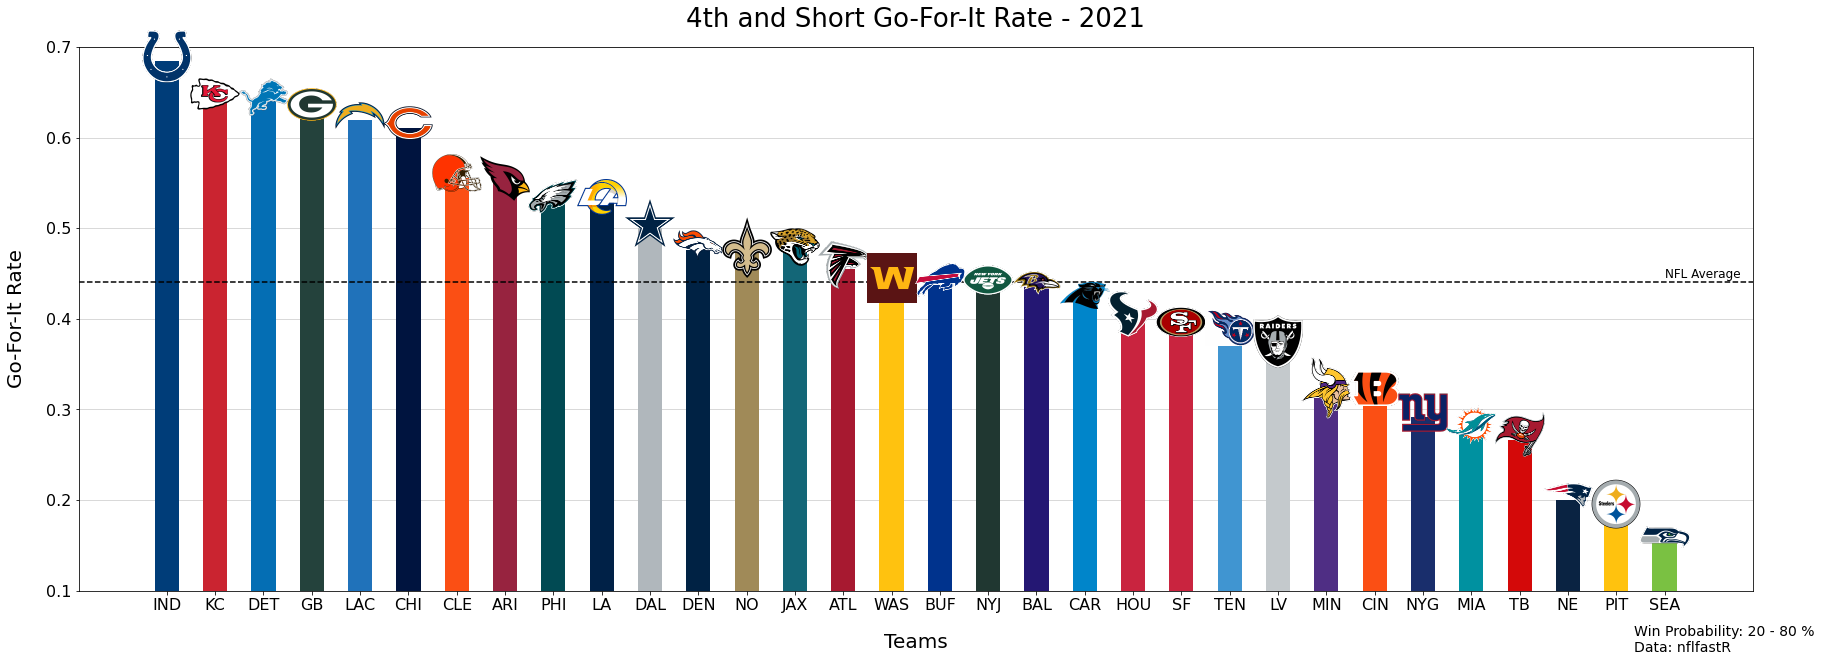

<Figure size 432x288 with 0 Axes>

In [59]:
fig, ax = plt.subplots(figsize=(30,10))

#Create league average line
ax.axhline(y=go_for_it_rate_df['Go_For_It_Rate'].mean(), linestyle='--', color='black')

#Add team logos
for x0, y0, path in zip(np.arange(0,32), go_for_it_rate_df['Go_For_It_Rate']+.005, go_for_it_rate_df['logo']):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)

#Add bar chart, x axis is an array from 0-31 (length of 32, one per team)
ax.bar(np.arange(0,32), go_for_it_rate_df['Go_For_It_Rate'], color=go_for_it_rate_df["color"], width=.5)
    
#Add a grid across the y-axis
ax.grid(zorder=0,alpha=.6,axis='y')
ax.set_axisbelow(True)
ax.set_xticks(np.arange(0,32))
#Add team abbreviations as x tick labels
ax.set_xticklabels(go_for_it_rate_df.Team,fontsize=16)

#Start y-axis at .3 (30%) to eliminate wasted space
ax.set_ylim(.1,.7)
ax.set_yticks([.1, .2, .3,.4,.5,.6,.7])
ax.set_yticklabels([0.1, 0.2, 0.3,0.4,0.5,0.6,0.7],fontsize=16)

ax.set_ylabel('Go-For-It Rate', fontsize=20, labelpad=20)
ax.set_xlabel('Teams', fontsize=20, labelpad=20)
ax.set_title('4th and Short Go-For-It Rate - 2021', fontsize=26, pad=20)
plt.figtext(.845, .04, 'Win Probability: 20 - 80 %\nData: nflfastR', fontsize=14)
plt.text(31, go_for_it_rate_df['Go_For_It_Rate'].mean()+.005, 'NFL Average', fontsize=12)

plt.show()
#plt.savefig('nfl_go_for_it_rate.png',dpi=300)